In [1]:
pip install -r "C:\Users\Skole\Desktop\requirements.txt"

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'C:\\Users\\Skole\\Desktop\\requirements.txt'


In [2]:
%run 01_Model_CFE.ipynb
import numpy as np

ADS: frdp_c --> AMOR + ppi_c
CPR1_CYP71AV1: AMOR + h_c + nadph_c + o2_c --> AAOH + h2o_c + nadp_c
ADH1: AAOH + nad_c --> AAld + h_c + nadh_c
ALDH1: AAld + h2o_c + nadp_c --> AA + h_c + nadph_c


Intro to gene prediction targetsProductivity calcualted using the model standard media:

In [3]:
from cameo.strain_design.deterministic.flux_variability_based import FSEOF
fseof = FSEOF(iMM904)
result = fseof.run(target = iMM904.reactions.ALDH1)
df = result.data_frame

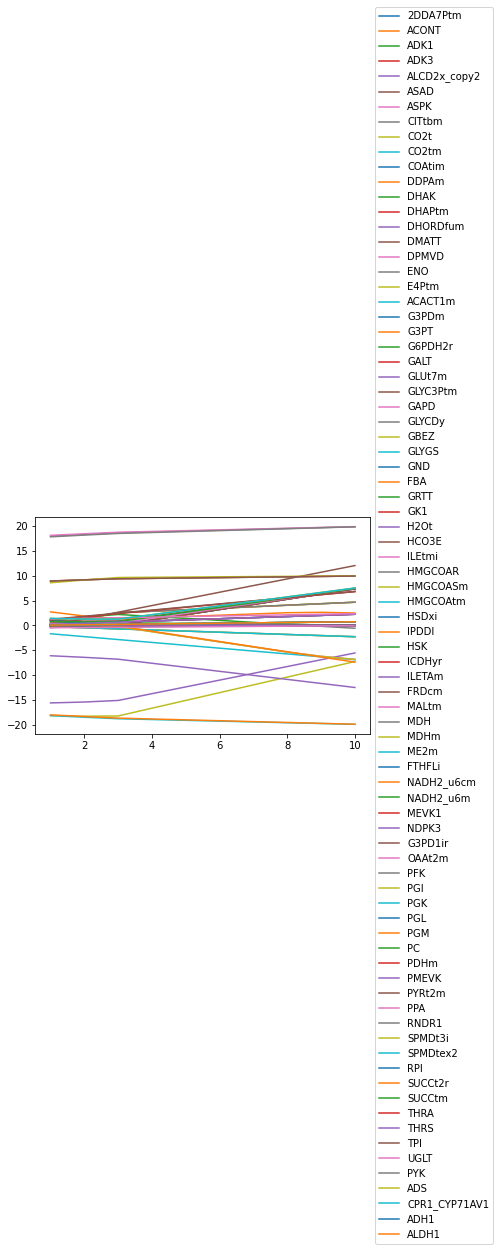

In [4]:
from matplotlib import pyplot as plt
result.data_frame.T.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [5]:
# sorting the dataframe
df= df.sort_values([1], ascending = False)
 
from pytest import approx
# removing genes from dataframe 
removed_zero = (df != approx(0.0)).all(axis=1)
df = df.loc[removed_zero]
df.head()

,1,2,3,4,5,6,7,8,9,10
GAPD,18.080128,18.399085,18.701275,18.861392,19.021508,19.181625,19.341742,19.501858,19.661975,19.822092
ENO,17.925459,18.258809,18.576689,18.752165,18.927642,19.103119,19.278595,19.454072,19.629549,19.805025
PYK,17.781993,18.128694,18.460069,18.649924,18.839778,19.029632,19.219487,19.409341,19.599195,19.789050
PFK,8.916108,9.157269,9.380821,9.457158,9.533495,9.609832,9.686169,9.762506,9.838844,9.915181
FBA,8.916108,9.157269,9.380821,9.457158,9.533495,9.609832,9.686169,9.762506,9.838844,9.915181


In [6]:
df.shape[0]


82

Text(0.5, 1.0, 'Flux scanning based on Enforced Objective Flux')

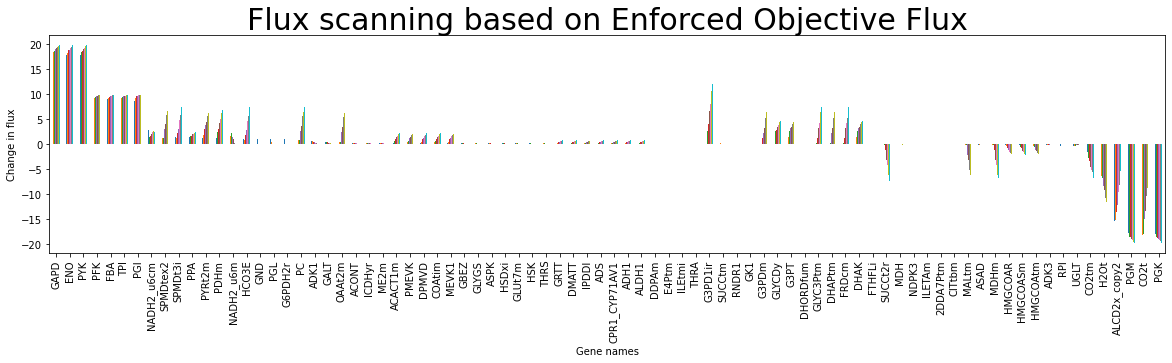

In [7]:
def bar_color(df,color1,color2):
    return np.where(df.values >=0,color1,color2).T

fig = df.plot(legend=None, kind='bar',figsize=(20, 4), grid =False)
fig.set_ylabel('Change in flux')
fig.set_xlabel('Gene names')
fig.set_title('Flux scanning based on Enforced Objective Flux', size=30)

In [8]:
df['relative_change_in_flux'] = (df[10]-df[1])/df[10] +1


In [9]:
target_reactions_df = df[df['relative_change_in_flux'] > 1.8]


In [10]:
target_reactions_df


,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
SPMDtex2,1.420311,1.288137,1.274311,2.165149,3.055986,3.946824,4.837662,5.728500,6.619338,7.510176,1.810882
SPMDt3i,1.420311,1.288137,1.274311,2.165149,3.055986,3.946824,4.837662,5.728500,6.619338,7.510176,1.810882
PYRt2m,1.231906,1.852465,2.475350,3.094827,3.714304,4.333781,4.953258,5.572735,6.192212,6.811689,1.819148
PDHm,1.123262,1.753931,2.387036,3.017401,3.647766,4.278131,4.908496,5.538861,6.169226,6.799592,1.834805
HCO3E,0.973859,0.885847,0.916027,1.851036,2.786046,3.721056,4.656066,5.591076,6.526086,7.461096,1.869475
PC,0.792315,0.721197,0.768454,1.721658,2.674862,3.628065,4.581269,5.534473,6.487677,7.440880,1.893519
OAAt2m,0.422746,0.383406,0.464557,1.455228,2.445898,3.436569,4.427239,5.417910,6.244162,6.839031,1.938186
ACACT1m,0.228582,0.453249,0.677912,0.902553,1.127194,1.351835,1.576475,1.801116,2.025757,2.250398,1.898426
PMEVK,0.228582,0.453249,0.677912,0.902553,1.127194,1.351835,1.576475,1.801116,2.025757,2.250398,1.898426
DPMVD,0.228582,0.453249,0.677912,0.902553,1.127194,1.351835,1.576475,1.801116,2.025757,2.250398,1.898426


In [11]:
df = target_reactions_df.drop(labels='relative_change_in_flux', axis=1)


Text(0.5, 1.0, 'Reactions with a relative change in Flux > 80%')

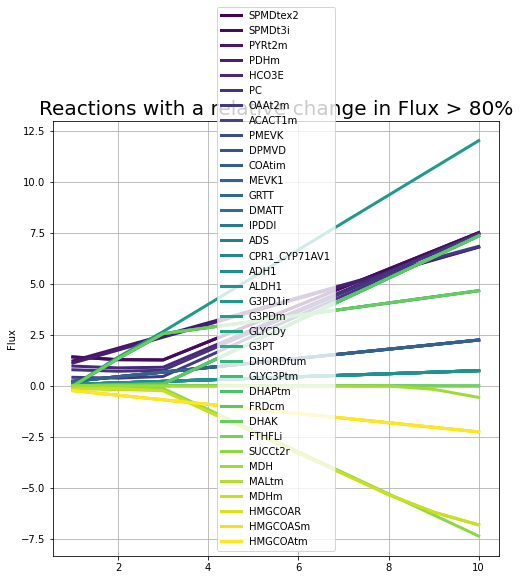

In [12]:
fig = df.T.plot(cmap="viridis",figsize=(8, 8), grid =True, linewidth=3);
fig.set_ylabel('Flux')
fig.set_title('Reactions with a relative change in Flux > 80%', size=20)

In [13]:
#lowest flux reactions
target_reactions_df.tail()


,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
MALtm,-0.105722,-0.185720,-0.204513,-1.227244,-2.249974,-3.272705,-4.295436,-5.318167,-6.176479,-6.803409,1.984460
MDHm,-0.143354,-0.132628,-0.239790,-1.258171,-2.276553,-3.294934,-4.313316,-5.331697,-6.185661,-6.808241,1.978944
HMGCOAR,-0.228582,-0.453249,-0.677912,-0.902553,-1.127194,-1.351835,-1.576475,-1.801116,-2.025757,-2.250398,1.898426
HMGCOASm,-0.228582,-0.453249,-0.677912,-0.902553,-1.127194,-1.351835,-1.576475,-1.801116,-2.025757,-2.250398,1.898426
HMGCOAtm,-0.228582,-0.453249,-0.677912,-0.902553,-1.127194,-1.351835,-1.576475,-1.801116,-2.025757,-2.250398,1.898426


In [14]:
#higest flux reactions
target_reactions_df.head()


,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
SPMDtex2,1.420311,1.288137,1.274311,2.165149,3.055986,3.946824,4.837662,5.728500,6.619338,7.510176,1.810882
SPMDt3i,1.420311,1.288137,1.274311,2.165149,3.055986,3.946824,4.837662,5.728500,6.619338,7.510176,1.810882
PYRt2m,1.231906,1.852465,2.475350,3.094827,3.714304,4.333781,4.953258,5.572735,6.192212,6.811689,1.819148
PDHm,1.123262,1.753931,2.387036,3.017401,3.647766,4.278131,4.908496,5.538861,6.169226,6.799592,1.834805
HCO3E,0.973859,0.885847,0.916027,1.851036,2.786046,3.721056,4.656066,5.591076,6.526086,7.461096,1.869475
